[View in Colaboratory](https://colab.research.google.com/github/lcckkkhaha/ML-basic/blob/master/Tensorflow.ipynb)

In [23]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

x_data = np.random.rand(1000).astype(np.float32)
y_data = x_data*0.1 + 0.3



X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)


Weight = tf.Variable(np.random.random([1]).astype(np.float32))
Bias = tf.Variable(np.random.random([1]).astype(np.float32))

print('Initial Weight:',np.random.random([1]).astype(np.float32))
print('Initial Bias:',np.random.random([1]).astype(np.float32))

y = Weight*X_train + Bias

loss = tf.reduce_mean(tf.square(y-y_train))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)
sess = tf.Session()
sess.run(tf.initialize_all_variables())


for i in range(201):
  sess.run(train)
  if i%20 == 0:
    print(i,':',sess.run(Weight),sess.run(Bias))
    

Initial Weight: [0.07923872]
Initial Bias: [0.4403966]
0 : [0.42178282] [0.79433125]
20 : [0.13850193] [0.281818]
40 : [0.12900802] [0.2847849]
60 : [0.12233362] [0.28828102]
80 : [0.11719642] [0.2909766]
100 : [0.11324091] [0.29305217]
120 : [0.11019523] [0.29465032]
140 : [0.1078501] [0.29588085]
160 : [0.10604443] [0.29682833]
180 : [0.10465408] [0.2975579]
200 : [0.10358354] [0.29811963]


X_train shape: (670, 1)
y_train shape: (670, 1)
X_test shape: (330, 1)
y_test shape: (330, 1)
34.16911
0.11524879
0.034261253
0.014659817
0.009310235
0.0072152093
0.0060289754
0.0052409987
0.0046893135
0.004290853


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


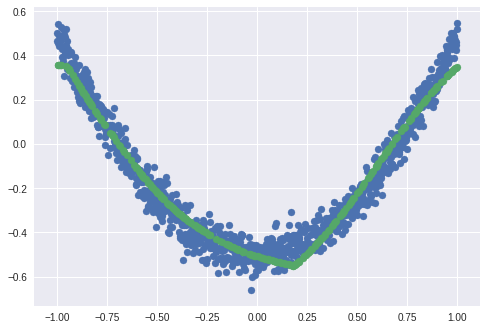

In [94]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
  Weights = tf.Variable(np.random.random([in_size,out_size]).astype(np.float32))
  Biases = tf.Variable(np.random.random([1,out_size]).astype(np.float32))
  neural_value = tf.matmul(inputs,Weights) + Biases
  if(activation_function == None):
    outputs = neural_value
  else:
    outputs = activation_function(neural_value)
    
  return outputs

#####  boston data
#data = datasets.load_boston()
#data_x=data.data
#data_y=data.target

#data_y=np.matrix(data_y)
#data_y=np.transpose(data_y)
#####  boston data


#####  random data
data_x = np.linspace(-1,1,1000)[:, np.newaxis]
noise = np.random.normal(0, 0.05, data_x.shape)
data_y = np.square(data_x) - 0.5 + noise
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = ax.scatter(data_x,data_y)
plt.ion()
#plt.show()
#####  random data


X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=42)

#y_train=np.matrix(y_train)
#y_train=np.transpose(y_train)

#X_train = preprocessing.normalize(X_train)
#y_train = preprocessing.normalize(y_train)





layer_1_neural=20
layer_2_neural=10
learning_rate=0.01



print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

train_x = tf.placeholder(tf.float32, shape=(None,X_train.shape[1]))
train_y = tf.placeholder(tf.float32, shape=(None,1))

layer_1 = add_layer(train_x,train_x.shape[1],layer_1_neural,activation_function=tf.nn.relu)
layer_2 = add_layer(layer_1,layer_1_neural,layer_2_neural,activation_function=tf.sigmoid)
prediction = add_layer(layer_2,layer_2_neural,train_y.shape[1],activation_function=None)

with tf.name_scope('loss'):
  loss = tf.reduce_mean(tf.square(prediction - train_y)) 

#train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)




sess=tf.Session()

writer = tf.summary.FileWriter("graphs/", sess.graph)

sess.run(tf.initialize_all_variables())





for i in range(1000):
  sess.run(train, feed_dict={train_x:X_train,train_y:y_train})
  if i%100 == 0:
    print(sess.run(loss,feed_dict={train_x:X_train,train_y:y_train}))
    #print(sess.run(prediction,feed_dict={train_x:X_train,train_y:y_train}))
    
prediction_value=sess.run(prediction,feed_dict={train_x:X_test})
ax1 = plt.axes()
ax1.scatter(X_test, prediction_value)
plt.show()



In [2]:
#############  NN Classification

import tensorflow as tf
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import pandas as pd
import pickle


def add_layer(inputs, in_size, out_size, activation_function=None):
  Weights = tf.Variable(np.random.random([in_size,out_size]).astype(np.float32))
  Biases = tf.Variable(np.random.random([1,out_size]).astype(np.float32))
  neural_value = tf.matmul(inputs,Weights) + Biases
  
  neural_value = tf.nn.dropout(neural_value, dropout_rate)
  
  if(activation_function == None):
    outputs = neural_value
  else:
    outputs = activation_function(neural_value)
    
  return outputs


##### load data
data = datasets.load_digits()
data_x=data.data
data_y=data.target

lb = preprocessing.LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
lb.fit(data_y)
data_y=lb.transform(data_y)


X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=42)
classes=y_train.shape[1]


#y_train=np.matrix(y_train)
#y_train=np.transpose(y_train)

#print(y_train)

print('data_x shape:',data_x.shape)
print('data_y shape:',data_y.shape)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

#print(y_train)
#plt.gray() 
#plt.matshow(data.images[1]) 
#plt.show()

#data_y=np.matrix(data_y)
#data_y=np.transpose(data_y)
##### load data


layer_1_neural=180
layer_2_neural=30
learning_rate=0.6
do_rate=0.8


dropout_rate = tf.placeholder(tf.float32)
train_x = tf.placeholder(tf.float32, shape=(None,X_train.shape[1]))
train_y = tf.placeholder(tf.float32, shape=(None,classes))

layer_1 = add_layer(train_x,train_x.shape[1],layer_1_neural,activation_function=tf.nn.softmax)
layer_2 = add_layer(layer_1,layer_1_neural,layer_2_neural,activation_function=tf.nn.tanh)
prediction = add_layer(layer_2,layer_2_neural,train_y.shape[1],activation_function=tf.nn.softmax)

#prediction = add_layer(train_x,train_x.shape[1],train_y.shape[1],activation_function=tf.nn.softmax)


loss=tf.reduce_mean(-tf.reduce_sum(train_y * tf.log(prediction),reduction_indices=[1]))
#loss=tf.reduce_mean(-tf.reduce_sum(train_y*tf.log(prediction))) 
#loss = tf.reduce_mean(tf.square(prediction - train_y)) 

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
#train = tf.train.AdamOptimizer(learning_rate).minimize(loss)




sess=tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(5000):
  sess.run(train, feed_dict={train_x:X_train,train_y:y_train, dropout_rate:do_rate})
  if i%500 == 0:
    print('loss:',sess.run(loss,feed_dict={train_x:X_train,train_y:y_train, dropout_rate:do_rate}))
    true = y_train
    #print('true:',true.shape)
    pre =np.array(sess.run(prediction,feed_dict={train_x:X_train, dropout_rate:do_rate}))
    #pre=np.around(pre)
    pre=np.matrix(pre)
    #print(pre)
    pre=label_binarize(pre.argmax(1),classes=list(range(classes)))
   # print('pre:',pre.shape)
    
    print('Accuracy:',accuracy_score(true,pre))
    
    pre_t =np.array(sess.run(prediction,feed_dict={train_x:X_test,dropout_rate:1}))
    pre_t=np.matrix(pre_t)
    pre_t=label_binarize(pre_t.argmax(1),classes=list(range(classes)))
    
    print('Test Accuracy:',accuracy_score(y_test,pre_t))
    
    
    
    
output = open('NN_classifier_digital_0.97.pkl', 'wb')    
pickle.dump(sess, output)
output.close()
# #### prediction
# true=y_test
# pre =np.array(sess.run(prediction,feed_dict={train_x:X_test}))
# pre=np.matrix(pre)
# pre=label_binarize(pre.argmax(1),classes=list(range(classes)))
# # print('pre:',pre.shape)

# print('Test Accuracy:',accuracy_score(true,pre))
# #### prediction

data_x shape: (1797, 64)
data_y shape: (1797, 10)
X_train shape: (1437, 64)
y_train shape: (1437, 10)
X_test shape: (360, 64)
y_test shape: (360, 10)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666
loss: nan
Accuracy: 0.10090466249130133
Test Accuracy: 0.09166666666666666


TypeError: ignored

In [263]:
ls

backend-container/
bin/
boot/
colabtools/
content/
datalab/
dev/
etc/
gpu-tensorflow-1.6.0-cp27-cp27mu-linux_x86_64.whl
gpu-tensorflow-1.6.0-cp36-cp36m-linux_x86_64.whl
home/
lib/
lib64/
media/
mnt/
node_modules/
opt/
proc/
requirements.txt
root/
run/
sbin/
srv/
sys/
tensorflow-1.6.0-cp27-cp27mu-linux_x86_64.whl
tensorflow-1.6.0-cp36-cp36m-linux_x86_64.whl
tf_deps/
tmp/
tools/
usr/
var/
